In [1]:
##Importar las librerías requeridas para el análisis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
##Definir tamaño máximo de filas a mostrar
pd.set_option('display.max_rows', 100)

In [3]:
##Importar el dataset del CSV
automotores_df = pd.read_csv('../data/hurto_motocicletasV2.csv')

In [24]:
##Importar el dataset de la población
poblacion_df = pd.read_csv('../data/poblacion.csv')

In [4]:
#Visualizamos un parte del dataset
automotores_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,ANTIOQUIA,MEDELLÍN,5001,ARMA DE FUEGO,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
1,ANTIOQUIA,OPACABANA,5212,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
2,ANTIOQUIA,MEDELLÍN,5001,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
3,CUNDINAMARCA,BOGOTÁ D.C.,11001,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
4,VALLE,ALI,76001,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1


In [25]:
#Visualizamos un parte del dataset
poblacion_df.head()

,DEPARTAMENTO,POBLACIÓN
0,AMAZONAS,48144
1,ANTIOQUIA,2427129
2,ARAUCA,85585
3,ATLÁNTICO,1206319
4,BOLÍVAR,973045


In [13]:
##Cambiar el formato de las fechas
automotores_df['FECHA HECHO'] = pd.to_datetime(automotores_df['FECHA HECHO'], format = '%d/%m/%Y')

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
276799    2022
276800    2022
276801    2022
276802    2022
276803    2022
Name: FECHA HECHO, Length: 276804, dtype: int64

In [47]:
##Dejar en el dataframe solamente los casos de los departamentos de los últimos 5 años
automotores_df['FECHA HECHO'] = pd.to_datetime(automotores_df['FECHA HECHO'], format = '%d/%m/%Y')
automotores_df.drop(automotores_df[automotores_df['FECHA HECHO'].dt.year > 2017].index, inplace = True)

In [74]:
#Creamos un nuevo dataframe con el historico de hace 5 años
automotores2_df = automotores_df.groupby(['DEPARTAMENTO']).agg({'CANTIDAD':'sum'}).reset_index()

In [76]:
#Verificamos el nuevo dataset
automotores2_df = automotores2_df.sort_values(by=['CANTIDAD'], ascending=False).head(5)

In [77]:
#Función para devolver la cantidad de habitantes en un departamento a partir del nombre
def get_population(code):
    hab = poblacion_df.loc[poblacion_df['DEPARTAMENTO']==code,['POBLACIÓN']]
    if hab.empty:
        return 0
    else:
        return hab.iloc[0]['POBLACIÓN']

In [78]:
#Crear una nueva columna en el dataframe para almacenar la cantidad de habitantes aplicando la función que los retorna
automotores2_df['HABITANTES'] = automotores2_df['DEPARTAMENTO'].apply(get_population)

In [79]:
automotores2_df['Percapita'] = automotores2_df['CANTIDAD']/automotores2_df['HABITANTES']

In [81]:
##Crear una nueva columna para normalizar la cantidad de casos por cada 100.000 habitantes
automotores2_df['Percapita']=(automotores2_df['CANTIDAD']/automotores2_df['HABITANTES'])*100000

<AxesSubplot:ylabel='DEPARTAMENTO'>

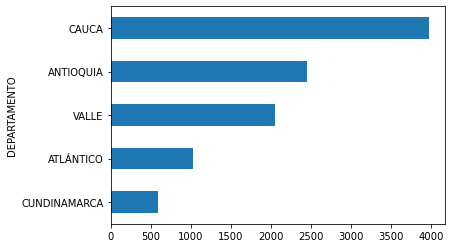

In [84]:
#Se visualiza el comportamiento de los hurtos cometidos durante los últimos 5 años categorizado por año
aux = automotores2_df.groupby(automotores2_df['DEPARTAMENTO'])['Percapita'].sum().sort_values()
aux.plot(kind='barh')